In [1]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import saraRC1 as sara

**Multi-Plot**

In [2]:
img_path = './images'
imgs = []

for root, dirs, files in os.walk(img_path):
    for file in files:
        # imgs.append(cv2.cvtColor(cv2.imread(os.path.join(root, file)), cv2.COLOR_BGR2RGB))
        imgs.append(cv2.imread(os.path.join(root, file)))

In [3]:
seg_dim = 9
saliency_maps = {}
sara_heatmaps = {}
sara_lists = {}

In [4]:
import numpy as np
from scipy.misc import face
from scipy.ndimage import zoom
from scipy.special import logsumexp
import torch

import deepgaze_pytorch

# DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
DEVICE = "cpu"

# you can use DeepGazeI or DeepGazeIIE
# model = deepgaze_pytorch.DeepGazeIIE(pretrained=True).to(DEVICE)

model = deepgaze_pytorch.DeepGazeIIE(pretrained=True).to(DEVICE)

Loaded pretrained weights for efficientnet-b5


Using cache found in /home/matthewkenely/.cache/torch/hub/pytorch_vision_v0.6.0
Using cache found in /home/matthewkenely/.cache/torch/hub/pytorch_vision_v0.6.0


In [5]:
plt.rcParams['figure.figsize'] = [20, 10]
plt.figure()
plt.tight_layout()

generators = ['itti', 'deepgaze']

g = 1

for i, im in enumerate(imgs):
    if i not in saliency_maps:
        saliency_maps[i] = {}
        sara_heatmaps[i] = {}
        sara_lists[i] = {}

    for generator in generators:
        percent = round(g/(len(imgs)*len(generators))*100, 2)
        
        print(f'--> Processing image {i+1} of {len(imgs)} ({generator}) [{percent}%]')

        if generator == 'deepgaze':
            saliency_maps[i][generator] = sara.return_saliency(im.copy(), generator=generator, deepgaze_model=model)
        else:
            saliency_maps[i][generator] = sara.return_saliency(im.copy(), generator=generator)
        sara.reset()

        sara_heatmaps[i][generator], sara_lists[i][generator] = sara.return_sara(im.copy(), seg_dim, saliency_map=saliency_maps[i][generator])
        sara.reset()

        g += 1
    
    plt.subplot(1, len(imgs), i+1)
    plt.imshow(im)
    plt.axis('off')


--> Processing image 1 of 4 (itti) [12.5%]
--> Processing image 1 of 4 (deepgaze) [25.0%]


/home/matthewkenely/Programming/Assignments/ICT3909 Final Year Project in Artificial Intelligence/ICT3909/optimisations/saliency-generator/saraRC1.py:114: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
  image_tensor = torch.tensor([image.transpose(2, 0, 1)]).to(DEVICE)


: 

In [ ]:
# Make ground truth masks

# Books
gt_masks = {}

def get_gt(original, name):
    all_masks = np.zeros((original.shape[0], original.shape[1]))

    for i in range(3):
        temp_mask = cv2.imread('./gt/' + name + '/' + str(i+1) + '.png')
        temp_mask = cv2.cvtColor(temp_mask, cv2.COLOR_BGR2GRAY)
        # threshold
        all_masks += temp_mask
        all_masks[all_masks > 0] = 1

    all_masks = cv2.GaussianBlur(all_masks, (31, 31), 20, 0, 20)

    # plt.imshow(all_masks, cmap='jet')

    return all_masks

original = cv2.imread('./images/books.jpeg')
gt_masks['books'] = get_gt(original, 'books')

original = cv2.imread('./images/mugs.jpeg')
gt_masks['mugs'] = get_gt(original, 'mugs')

original = cv2.imread('./images/shoes.jpeg')
gt_masks['shoes'] = get_gt(original, 'shoes')

original = cv2.imread('./images/statues.jpeg')
gt_masks['statues'] = get_gt(original, 'statues')

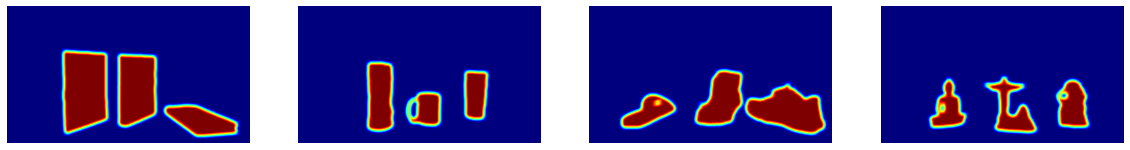

In [ ]:
plt.figure()

names = ['books', 'mugs', 'shoes', 'statues']

for i, name in enumerate(names):
    plt.subplot(1, 4, i+1)
    plt.imshow(gt_masks[name], cmap='jet')
    plt.axis('off')

In [ ]:
for i in range(len(gt_masks)):
    saliency_maps[i]['gt'] = gt_masks[names[i]]

--> Processing image 1 of 4 (gt) [25.0%]


c:\Programming\Assignments\ICT3909 Final Year Project in Artificial Intelligence\ICT3909\optimisations\saliency-generator\saraRC1.py:240: RuntimeWarning: overflow encountered in double_scalars
  entropy += entropy + (t_prob * math.log((1 / t_prob), 2))


--> Processing image 2 of 4 (gt) [50.0%]
--> Processing image 3 of 4 (gt) [75.0%]
--> Processing image 4 of 4 (gt) [100.0%]


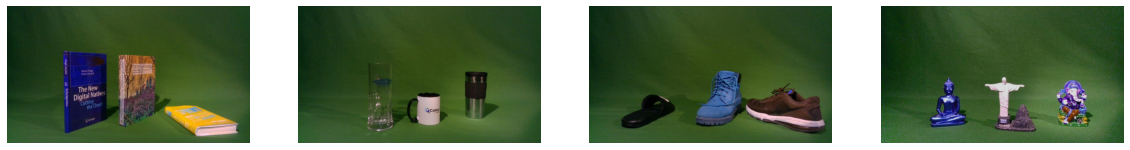

In [ ]:
# Create sara heatmaps using ground truth masks
plt.rcParams['figure.figsize'] = [20, 10]
plt.figure()
plt.tight_layout()

generators = ['gt']

g = 1

for i, im in enumerate(imgs):
    for generator in generators:
        percent = round(g/(len(imgs)*len(generators))*100, 2)
        
        print(f'--> Processing image {i+1} of {len(imgs)} ({generator}) [{percent}%]')

        sara_heatmaps[i][generator], sara_lists[i][generator] = sara.return_sara(im.copy(), seg_dim, saliency_map=saliency_maps[i][generator])
        sara.reset()

        g += 1
    
    plt.subplot(1, len(imgs), i+1)
    plt.imshow(im)
    plt.axis('off')


In [ ]:
saliency_maps_names = ['Itti', 'DeepGaze IIE']

In [ ]:
for i in range(len(imgs)):
    imgs[i] = cv2.cvtColor(imgs[i], cv2.COLOR_BGR2RGB)
    # imgs[i] = cv2.cvtColor(imgs[i], cv2.COLOR_RGB2BGR)

In [ ]:
names

['books', 'mugs', 'shoes', 'statues']

In [ ]:
names

['books', 'mugs', 'shoes', 'statues']

c:\Users\matth\anaconda3\envs\coco\lib\site-packages\ipykernel_launcher.py:34: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


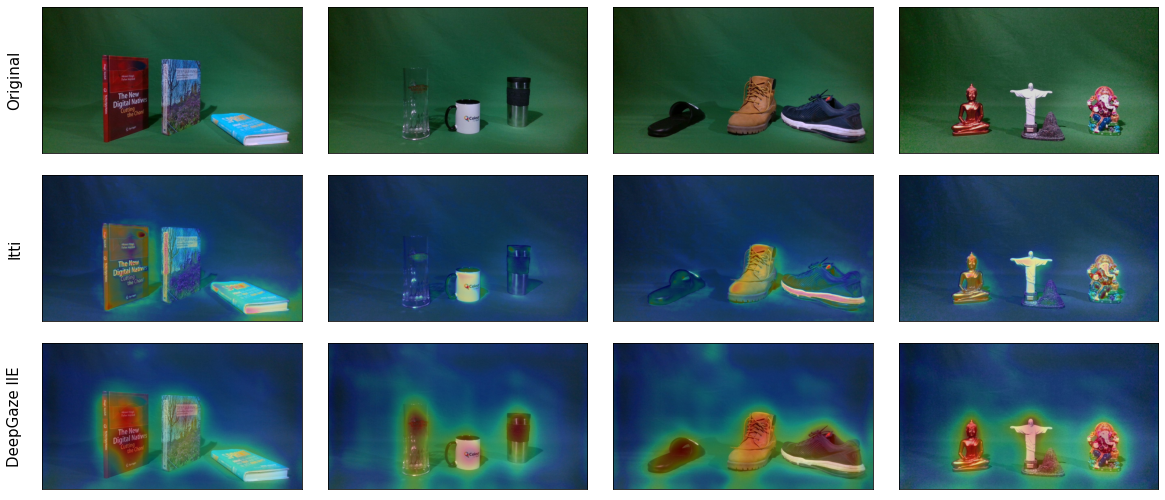

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [20, 9]
fig, ax = plt.subplots(3, 4, gridspec_kw={'hspace': 0.1, 'wspace': 0.1})

row_labels = ['Original', 'Itti', 'DeepGaze IIE']

or_alpha = 1
ma_alpha = 0.3

# Set row labels
for i, label in enumerate(row_labels):
    ax[i, 0].set_ylabel(label, fontsize=15, rotation=90, labelpad=20)

for i, name in enumerate(names):
    # Show original image
    ax[0, i].imshow(imgs[i])
    ax[0, i].set_xticks([])
    ax[0, i].set_yticks([])

    # Show Itti's saliency map
    ax[1, i].imshow(imgs[i], alpha=or_alpha)
    ax[1, i].imshow(saliency_maps[i]['itti'], cmap='jet', alpha=ma_alpha)
    ax[1, i].set_xticks([])
    ax[1, i].set_yticks([])

    # Show DeepGaze IIE's saliency map
    ax[2, i].imshow(imgs[i], alpha=or_alpha)
    ax[2, i].imshow(saliency_maps[i]['deepgaze'], cmap='jet', alpha=ma_alpha)
    ax[2, i].set_xticks([])
    ax[2, i].set_yticks([])


plt.tight_layout()
fig.patch.set_facecolor('white')

plt.show()


c:\Users\matth\anaconda3\envs\coco\lib\site-packages\ipykernel_launcher.py:37: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


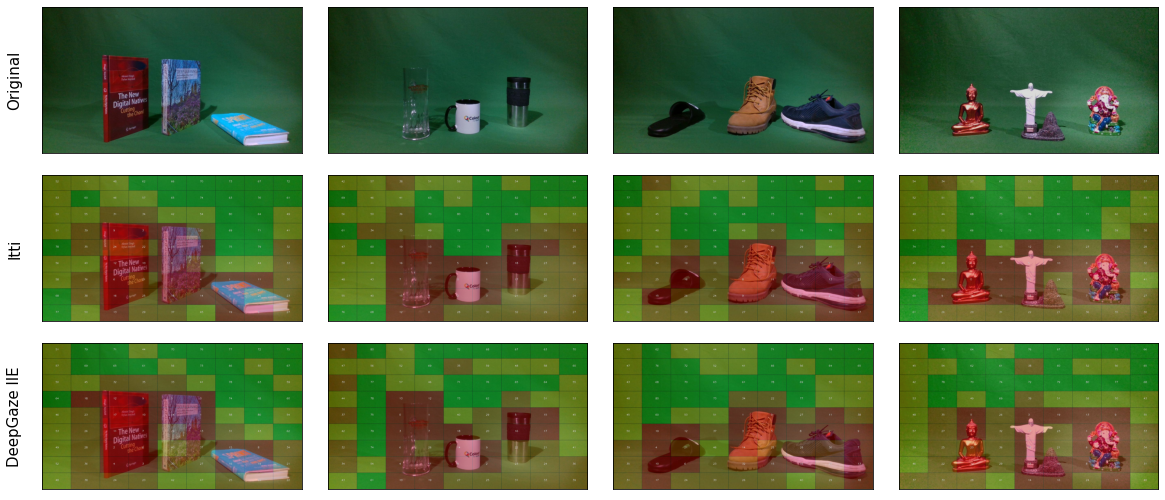

In [ ]:
plt.rcParams['figure.figsize'] = [20, 9]
fig, ax = plt.subplots(3, 4, gridspec_kw={'hspace': 0.1, 'wspace': 0.1})

row_labels = ['Original', 'Itti', 'DeepGaze IIE']

or_alpha = 1
ma_alpha = 1

# Set row labels
for i, label in enumerate(row_labels):
    ax[i, 0].set_ylabel(label, fontsize=15, rotation=90, labelpad=20)

for i, name in enumerate(names):
    # Show original image
    ax[0, i].imshow(imgs[i])
    ax[0, i].set_xticks([])
    ax[0, i].set_yticks([])

    # # Show ground truth saliency map
    # ax[1, i].imshow(imgs[i], alpha=or_alpha)
    # ax[1, i].imshow(gt_masks[list(gt_masks.keys())[i]], cmap='jet', alpha=ma_alpha)
    # ax[1, i].set_xticks([])
    # ax[1, i].set_yticks([])

    # Show Itti's saliency map
    ax[1, i].imshow(imgs[i], alpha=or_alpha)
    ax[1, i].imshow(cv2.cvtColor(sara_heatmaps[i]['itti'], cv2.COLOR_BGR2RGB), cmap='jet', alpha=ma_alpha)
    ax[1, i].set_xticks([])
    ax[1, i].set_yticks([])

    # Show DeepGaze IIE's saliency map
    ax[2, i].imshow(imgs[i], alpha=or_alpha)
    ax[2, i].imshow(cv2.cvtColor(sara_heatmaps[i]['deepgaze'], cv2.COLOR_BGR2RGB), cmap='jet', alpha=ma_alpha)
    ax[2, i].set_xticks([])
    ax[2, i].set_yticks([])

plt.tight_layout()
fig.patch.set_facecolor('white')

plt.show()

**<h2>Masks/ranks errors</h2>**

In [ ]:
generated

array([  8,  24,  19, ...,  20, 134,  18], dtype=uint8)

In [ ]:
target

array([  8,  24,  19, ...,  20, 134,  18], dtype=uint8)

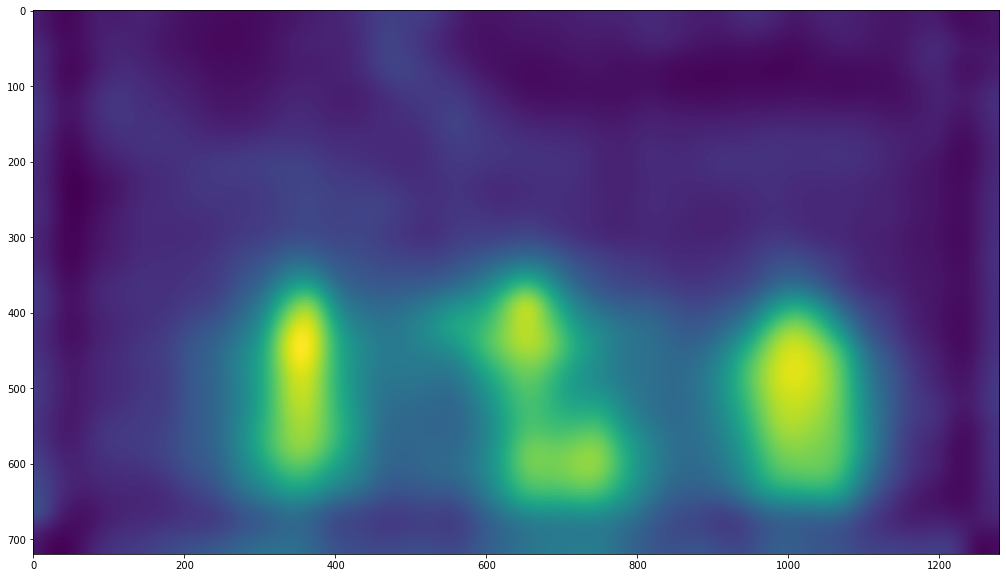

In [ ]:
plt.imshow(saliency_maps[i]['deepgaze'])

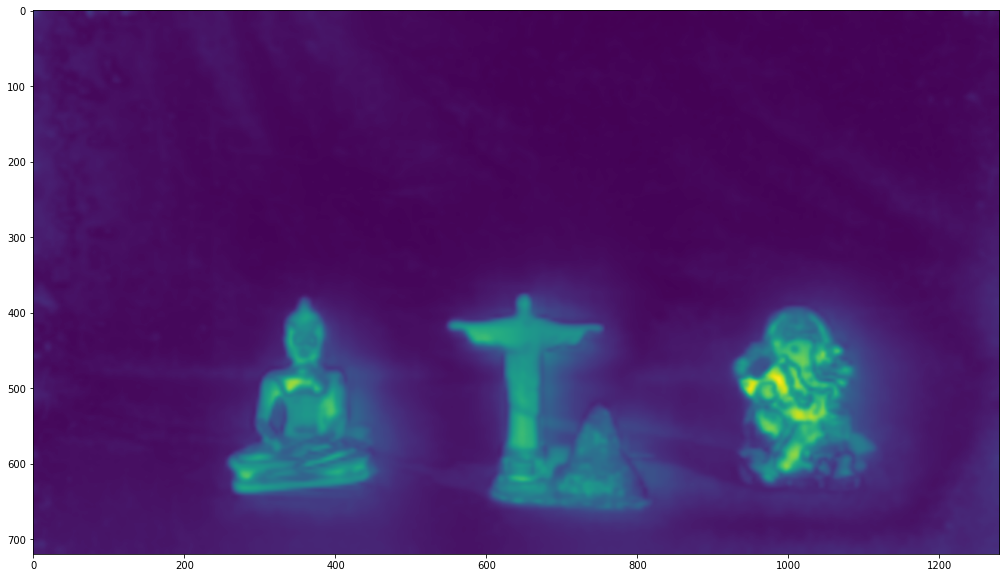

In [ ]:
plt.imshow(saliency_maps[i]['itti'])

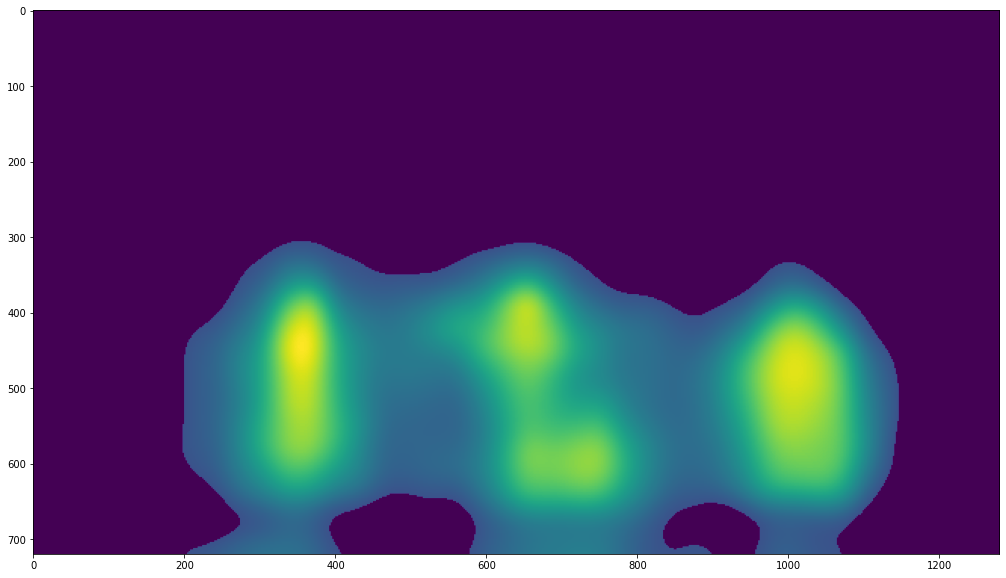

In [ ]:
for i in saliency_maps:
    new_mask = saliency_maps[i]['deepgaze'].copy()
    # Threshold
    new_mask[new_mask < 64] = 0
    plt.imshow(new_mask)

In [ ]:
saliency_maps[i]['new_deepgaze'] < 128

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [ ]:
saliency_maps[i]['gt']

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
iou = {}
mse = {}

generators = ['itti', 'deepgaze']

for i, name in enumerate(names):
    iou[name] = {}
    mse[name] = {}

    for generator in generators:
        # Calculate IoU
        iou[name][generator] = np.sum(np.logical_and(saliency_maps[i][generator], saliency_maps[i]['gt'])) / np.sum(np.logical_or(saliency_maps[i][generator], saliency_maps[i]['gt']))

        # Convert source to 1d array
        generated = saliency_maps[i][generator].flatten()

        # Convert target to 1d array
        target = saliency_maps[i]['gt'].flatten()

        mse[name][generator] = np.mean((generated - target) ** 2)

print(iou)
print(mse)

{'books': {'itti': 0.2751157300626815, 'deepgaze': 0.2751136398171343}, 'mugs': {'itti': 0.14735857288914841, 'deepgaze': 0.1473550543749593}, 'shoes': {'itti': 0.21195143204707909, 'deepgaze': 0.2119930709016945}, 'statues': {'itti': 0.15389616380222607, 'deepgaze': 0.1538672726167843}}
{'books': {'itti': 3787.1172366469996, 'deepgaze': 6811.654256995573}, 'mugs': {'itti': 826.2612174512907, 'deepgaze': 6624.536319605236}, 'shoes': {'itti': 2639.707039696015, 'deepgaze': 9274.453501760743}, 'statues': {'itti': 1837.6141560950095, 'deepgaze': 7557.857965129578}}


**<h2>Spearman Correlation (Metric for Ranks)</h2>**

In [ ]:
import scipy.stats as sc

ranks = {}
for key, value in sara_lists.items():
    ranks[key] = [i[0] for i in value]

print(ranks)
spr = sc.spearmanr(ranks["itti"], ranks["deepgaze"])
print(spr)


{'itti': [12, 4, 20, 21, 6, 13, 18, 3, 5, 14, 11, 19, 26, 48, 56, 17, 10, 29, 15, 25, 7, 22, 9, 24, 1, 2, 40, 32, 23, 30, 27, 8, 33, 63, 28, 16, 31, 39, 0, 47, 62, 55, 61, 37, 58, 59, 60, 53, 50, 57, 52, 36, 43, 34, 44, 51, 35, 38, 41, 49, 42, 46, 45, 54], 'deepgaze': [17, 22, 19, 9, 21, 18, 10, 6, 20, 1, 5, 7, 15, 31, 23, 14, 24, 48, 12, 13, 40, 16, 11, 4, 8, 32, 29, 2, 0, 3, 56, 63, 30, 25, 39, 47, 26, 61, 55, 52, 57, 58, 51, 53, 60, 59, 27, 45, 44, 62, 43, 41, 28, 50, 33, 49, 37, 54, 35, 42, 46, 36, 34, 38], 'fpn': [7, 1, 2, 0, 15, 3, 4, 6, 5, 23, 17, 13, 21, 29, 31, 22, 9, 10, 12, 8, 16, 20, 14, 11, 18, 19, 25, 30, 24, 32, 39, 47, 63, 40, 48, 27, 56, 28, 26, 33, 55, 61, 60, 52, 59, 51, 62, 44, 43, 35, 53, 36, 54, 57, 58, 49, 41, 37, 34, 50, 45, 38, 42, 46], 'emlnet': [0, 56, 8, 7, 1, 48, 16, 6, 2, 63, 15, 9, 40, 24, 5, 3, 32, 4, 23, 17, 14, 10, 31, 13, 11, 12, 22, 18, 21, 19, 61, 20, 62, 59, 57, 55, 29, 58, 30, 60, 39, 25, 47, 26, 51, 52, 27, 28, 53, 49, 54, 37, 45, 41, 44, 33, 43,

**<h2>Normalizing Spearman Correlation</h2>**

In [ ]:
def get_norm_spr(spr_value):
    #       m - r_min
    # m -> ---------------- x (t_max - t_min) + t_min
    #       r_max - r_min
    #
    # m = measure value
    # r_min = min range of measurement
    # r_max = max range of measurement
    # t_min = min range of desired scale
    # t_max = max range of desired scale

    r_min = -1
    r_max = 1

    norm_spr = (spr_value - r_min) / (r_max - r_min)

    return norm_spr

In [ ]:
norm_spr = get_norm_spr(spr.correlation)
print(norm_spr)

0.7540750915750916
